In [1]:
%matplotlib inline
from __future__ import division, print_function
import sys, os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [65]:
cat = Table.read('/Users/roz18/Documents/Data/LSST_photo-z_testbed/Cross-identification/Moffat v0.6/renamed files/DEEP2_uniq_Terapix_Subaru.fits')
print(len(cat))

# Exclude DEEP3?
exclude_deep3 = False

# MAG_APERCOR or MAG_AUTO?
mag_apercor_q = True

if exclude_deep3:
    maskname = np.array(cat['maskname'], dtype='int')
    mask = maskname<2000   # DEEP2
    # mask = MASKNAME>2000   # DEEP3
    cat = cat[mask]
    print(len(cat))

# require reliable redshift
mask = cat['zquality']>=3
cat = cat[mask]
print(len(cat))

# Require valid values in these columns
# col_list = ['u_apercor', 'g_apercor', 'r_apercor', 'i_apercor', 'z_apercor', 'y_apercor', 'u', 'g', 'r', 'i', 'z', 'y']
col_list = ['u_apercor', 'g_apercor', 'r_apercor', 'i_apercor', 'z_apercor', 'u', 'g', 'r', 'i', 'z']

mask = np.ones(len(cat), dtype=bool)
for index in range(len(col_list)):
    mask = mask & (cat[col_list[index]]!=99.) & (cat[col_list[index]]!=-99.)
cat = cat[mask]
print(len(cat))

# # Restrict to deeper region in Subaru
# mask = cat['subaru_source']==0
# cat = cat[mask]
# print(len(cat))

# Restrict to CFHTLS deep field
mask = cat['cfhtls_source']==0
cat = cat[mask]
print(len(cat))

if mag_apercor_q:
    umag = cat['u_apercor']
    gmag = cat['g_apercor']
    rmag = cat['r_apercor']
    imag = cat['i_apercor']
    zmag = cat['z_apercor']
    ymag = cat['y_apercor']
else:
    umag = cat['u']
    gmag = cat['g']
    rmag = cat['r']
    imag = cat['i']
    zmag = cat['z']
    ymag = cat['y']

z = cat['zhelio']  #Redshift

23822
16857
16255
10543


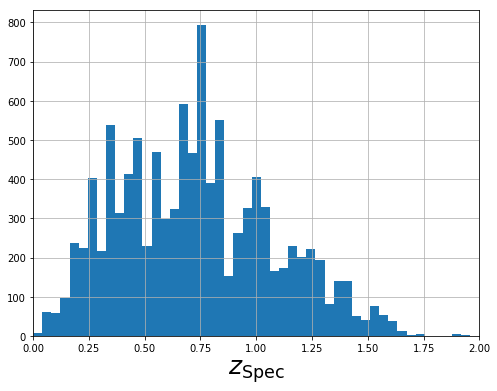

In [66]:
plt.figure(figsize=(8, 6))
plt.hist(z, bins=np.linspace(0, 2, 50))
plt.xlabel('$z_{\mathrm{Spec}}$', fontsize = 25)
plt.grid(alpha = 0.95)
plt.xlim(0, 2)
plt.show()

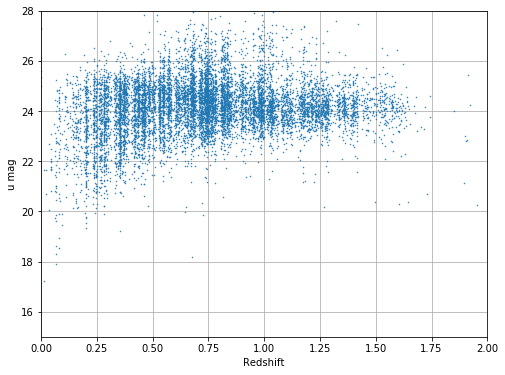

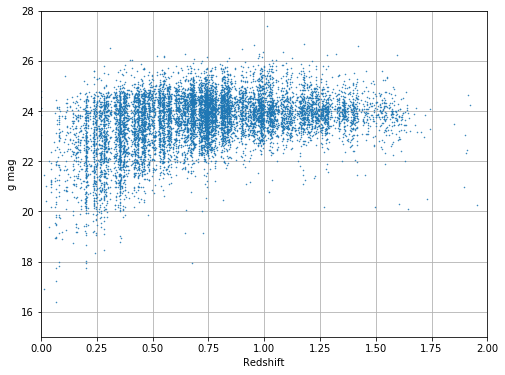

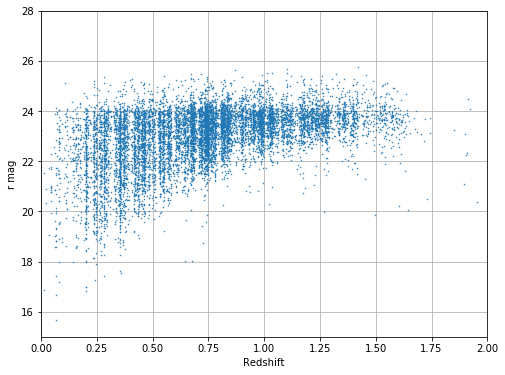

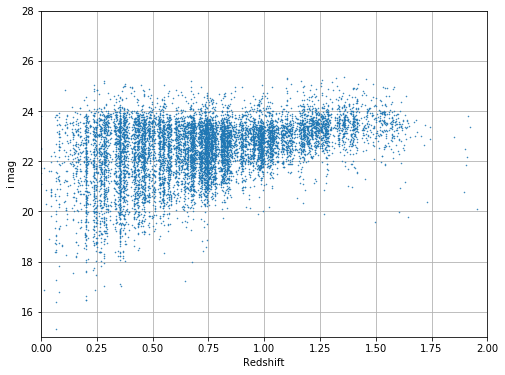

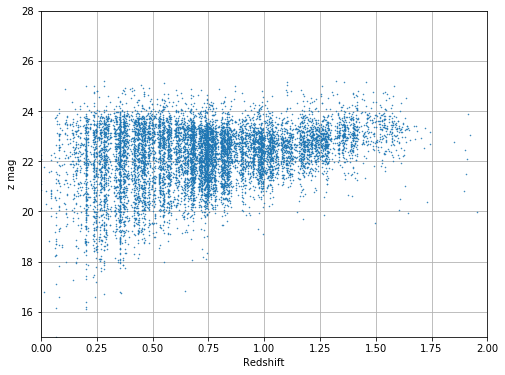

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(z, umag, '.', markersize=1, alpha=1.)
plt.xlim([0., 2.])
plt.ylim([15.0, 28])
plt.ylabel('u mag')
plt.xlabel('Redshift')
plt.grid()

plt.figure(figsize=(8, 6))
plt.plot(z, gmag, '.', markersize=1, alpha=1.)
plt.xlim([0., 2.])
plt.ylim([15.0, 28])
plt.ylabel('g mag')
plt.xlabel('Redshift')
plt.grid()

plt.figure(figsize=(8, 6))
plt.plot(z, rmag, '.', markersize=1, alpha=1.)
plt.xlim([0., 2.])
plt.ylim([15.0, 28])
plt.ylabel('r mag')
plt.xlabel('Redshift')
plt.grid()

plt.figure(figsize=(8, 6))
plt.plot(z, imag, '.', markersize=1, alpha=1.)
plt.xlim([0., 2.])
plt.ylim([15.0, 28])
plt.ylabel('i mag')
plt.xlabel('Redshift')
plt.grid()

plt.figure(figsize=(8, 6))
plt.plot(z, zmag, '.', markersize=1, alpha=1.)
plt.xlim([0., 2.])
plt.ylim([15.0, 28])
plt.ylabel('z mag')
plt.xlabel('Redshift')
plt.grid()

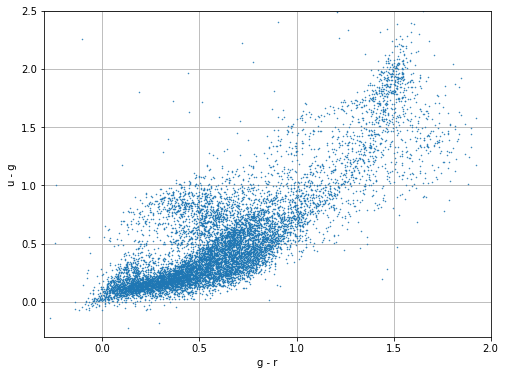

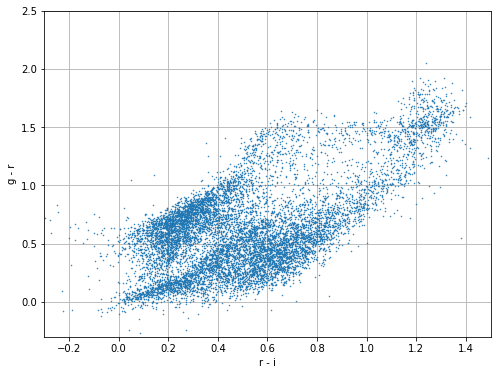

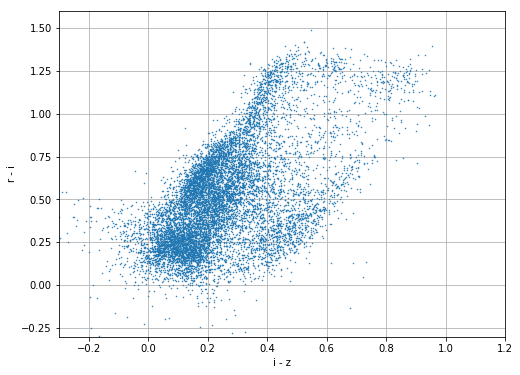

In [68]:
plt.figure(figsize=(8, 6))
plt.plot(gmag-rmag, umag-gmag, '.', markersize=1, alpha=1.)
plt.axis([-0.3, 2.0, -0.3, 2.5])
plt.xlabel('g - r')
plt.ylabel('u - g')
plt.grid()

plt.figure(figsize=(8, 6))
plt.plot(rmag-imag, gmag-rmag, '.', markersize=1, alpha=1.)
plt.axis([-0.3, 1.5, -0.3, 2.5])
plt.xlabel('r - i')
plt.ylabel('g - r')
plt.grid()

plt.figure(figsize=(8, 6))
plt.plot(imag-zmag, rmag-imag, '.', markersize=1, alpha=1.)
plt.axis([-0.3, 1.2, -0.3, 1.6])
plt.xlabel('i - z')
plt.ylabel('r - i')
plt.grid()